In [9]:
from collections import Counter
import numpy as np
from tensorflow.keras.preprocessing import sequence
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import scikitplot as skplt


def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.metrics.plot_confusion_matrix(yte, ypred)
    plt.show()
    
xtr = np.load('./x_train.npy', allow_pickle=True)
xte = np.load('./x_test.npy', allow_pickle=True)
y_train = np.load('./y_train.npy', allow_pickle=True)
y_test = np.load('./y_test.npy', allow_pickle=True)

In [11]:
# Define a mapping from labels to integers
label_mapping = {'Left': 0, 'Lean Left': 1, 'Center': 2, 'Lean Right': 3, 'Right': 4}

# Apply the mapping to your labels
y_train_encoded = np.array([label_mapping[label] for label in y_train])
y_test_encoded = np.array([label_mapping[label] for label in y_test])

# Check the transformed data
print("Encoded y_train: ", y_train_encoded[:5])
print("Encoded y_test: ", y_test_encoded[:5])

Encoded y_train:  [2 4 3 0 2]
Encoded y_test:  [4 4 3 4 4]


In [21]:
from tensorflow.keras.utils import to_categorical

# One-hot encode
y_train_encoded = to_categorical(y_train_encoded, num_classes=5)
y_test_encoded = to_categorical(y_test_encoded, num_classes=5)

print("One-hot encoded y_train: ", y_train_encoded[:5])
print("One-hot encoded y_test: ", y_test_encoded[:5])

One-hot encoded y_train:  [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
One-hot encoded y_test:  [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [23]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing import sequence

# Define constants
top_words = 5000
embedding_vector_length = 32
max_review_length = 500

# Create the model
model = Sequential()

# Add the Embedding layer without input_length
model.add(Embedding(input_dim=top_words + 2, output_dim=embedding_vector_length))

# Add the LSTM layer
model.add(LSTM(units=100))

# Add the Dense output layer
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(xtr, y_train_encoded, validation_data=(xte, y_test_encoded), epochs=epoch_num, batch_size=batch_size)

Epoch 1/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1043s 94ms/step - accuracy: 0.2302 - loss: 1.5988 - val_accuracy: 0.2483 - val_loss: 1.5889
Epoch 2/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1064s 96ms/step - accuracy: 0.2484 - loss: 1.5887 - val_accuracy: 0.2485 - val_loss: 1.5884
Epoch 3/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1049s 95ms/step - accuracy: 0.2491 - loss: 1.5874 - val_accuracy: 0.2492 - val_loss: 1.5886
Epoch 4/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1053s 95ms/step - accuracy: 0.2492 - loss: 1.5872 - val_accuracy: 0.2489 - val_loss: 1.5879
Epoch 5/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1097s 99ms/step - accuracy: 0.2486 - loss: 1.5876 - val_accuracy: 0.2496 - val_loss: 1.5873
Epoch 6/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1111s 100ms/step - accuracy: 0.2499 - loss: 1.5867 - val_accuracy: 0.2490 - val_loss: 1.5874
Epoch 7/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 1095s 99ms/step - accuracy: 0.2496 - loss: 1.5865 - val_accuracy: 0.2372 - val_loss: 1.5873
Epoch 8/10
11095/11095 ━━━━━━━━━━━━━━━━━━━━ 108

In [24]:
# Display the model summary
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (64, 300, 32)          │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (64, 100)              │        53,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 5)                │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641,309 (2.45 MB)

 Trainable params: 213,769 (835.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 427,540 (1.63 MB)

None


In [25]:
# Final evaluation of the model
scores = model.evaluate(xte, y_test_encoded, verbose=0)
print("Accuracy= %.2f%%" % (scores[1]*100))

Accuracy= 25.06%


5548/5548 ━━━━━━━━━━━━━━━━━━━━ 120s 22ms/step


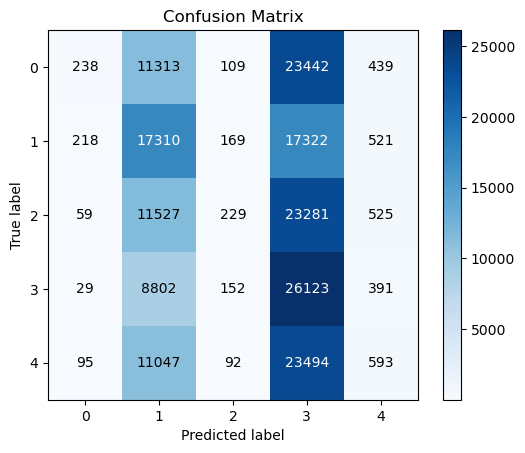

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

# Define the plot_cmat function using scikitplot
def plot_cmat(y_true, y_pred):
    skplt.metrics.plot_confusion_matrix(y_true, y_pred)
    plt.show()
    
# Generate predictions
y_pred_proba = model.predict(xte)

# Convert predicted probabilities to class indices
y_pred = np.argmax(y_pred_proba, axis=1)

# Since y_test_encoded was one-hot, we need to convert it back to integer encoding
y_test_integer_encoded = np.argmax(y_test_encoded, axis=1)

# Draw the confusion matrix
plot_cmat(y_test_integer_encoded, y_pred)


In [37]:
# Define a mapping from labels to integers
label_mapping = {'Left': 0, 'Lean Left': 1, 'Center': 2, 'Lean Right': 3, 'Right': 4}

# Apply the mapping to your labels
y_train_encoded = np.array([label_mapping[label] for label in y_train])
y_test_encoded = np.array([label_mapping[label] for label in y_test])

import numpy as np

# Print unique values and their counts for y_train_encoded
unique_train, counts_train = np.unique(y_train_encoded, return_counts=True)
print("Unique values in y_train_encoded:", unique_train)
print("Counts in y_train_encoded:", counts_train)

# Print unique values and their counts for y_test_encoded
unique_test, counts_test = np.unique(y_test_encoded, return_counts=True)
print("Unique values in y_test_encoded:", unique_test)
print("Counts in y_test_encoded:", counts_test)


Unique values in y_train_encoded: [0 1 2 3 4]
Counts in y_train_encoded: [141979 141980 141899 142023 142199]
Unique values in y_test_encoded: [0 1 2 3 4]
Counts in y_test_encoded: [35541 35540 35621 35497 35321]


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already loaded your dataset into x_train, x_test, y_train, y_test
logreg = LogisticRegression(max_iter=1000)
logreg.fit(xtr, y_train_encoded)

y_pred = logreg.predict(xte)

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44     35541
           1       0.45      0.40      0.42     35540
           2       0.38      0.41      0.39     35621
           3       0.54      0.61      0.57     35497
           4       0.42      0.41      0.41     35321

    accuracy                           0.45    177520
   macro avg       0.45      0.45      0.45    177520
weighted avg       0.45      0.45      0.45    177520



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtr, y_train_encoded)

y_pred = rf.predict(xte)

print(classification_report(y_test_encoded, y_pred))
